In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Capstone Project: Recommender System for The Cheese Shop Pte. Ltd. Part 1

# Problem Statement

The Cheese Shop (TCS) Pte. Ltd. relies on retail staff to recommended additional purchase during retail shop check out. Most of the full time retail staff rotates between different roles (arranging shelves, manning cashier, etc) during their shifts, hence, they may not get the full picture of customer purchases and their recommendations would not always be relevant.

TCS intends to improve their revenue of the retail and online stores by having a recommender system which is available at the retail/online stores.

TCS's recommender system will be built using the transaction data from their retail and physical stores.

# Data Acquisition

Retail Store Transaction Data:

Downloaded via export function on Vend Point of Sale system

Online Store Transaction Data:

Downloaded via export function on BigCommerce system

# Exploratory Data Analysis - Retail Store

In [2]:
# Read in retail dataset
retail_df = pd.read_csv("../dataset/sales-1680773909459.csv")

In [3]:
# Check structure of dataset
retail_df.head(9)

,Date,Receipt Number,Line Type,Customer Code,Note,Quantity,Subtotal,Sales Tax,Discount,Loyalty,Total,Paid,Details,Register,Status,Sku,AccountCodeSale,AccountCodePurchase
0,6/4/23 17:36,146499,Sale,WALKIN,NaN,5.338,48.75000,3.90000,0.0,0.42064,52.650,NaN,0.188 X Delice de Bourgogne + 0.15 X Double Cr...,Joo Chiat,CLOSED,NaN,NaN,NaN
1,6/4/23 17:36,146499,Sale Line,NaN,NaN,0.188,11.14074,0.89126,0.0,1.28000,12.032,NaN,Delice de Bourgogne,NaN,NaN,10216,NaN,NaN
2,6/4/23 17:36,146499,Sale Line,NaN,NaN,0.150,8.33333,0.66667,0.0,1.20000,9.000,NaN,Double Cream Brie with Garlic & Herbs,NaN,NaN,10765,NaN,NaN
3,6/4/23 17:36,146499,Sale Line,NaN,NaN,1.000,7.40741,0.59259,0.0,0.00000,8.000,NaN,Adrien Peyrolles Mini Ball Plain,NaN,NaN,3.47E+12,NaN,NaN
4,6/4/23 17:36,146499,Sale Line,NaN,NaN,1.000,7.40741,0.59259,0.0,0.00000,8.000,NaN,Adrien Peyrolles Mini Ball Plain,NaN,NaN,3.47E+12,NaN,NaN
5,6/4/23 17:36,146499,Sale Line,NaN,NaN,1.000,7.22222,0.57778,0.0,0.00000,7.800,NaN,Jamón Serrano Ham 100g,NaN,NaN,8.44E+12,NaN,NaN
6,6/4/23 17:36,146499,Sale Line,NaN,NaN,1.000,7.22222,0.57778,0.0,0.00000,7.800,NaN,Jamón Serrano Ham 100g,NaN,NaN,8.44E+12,NaN,NaN
7,6/4/23 17:36,146499,Sale Line,NaN,NaN,1.000,0.01852,0.00148,0.0,0.00000,0.020,NaN,Rounding +2c,NaN,NaN,10004,NaN,NaN
8,6/4/23 17:36,146499,Payment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.65,Credit Card,NaN,NaN,NaN,NaN,NaN


Comment:

Based on the receipt number, we can see that each transaction will have 3 "Line Type": Sale, Sale Line, and Payment

Text(0, 0.5, 'Customer Type')

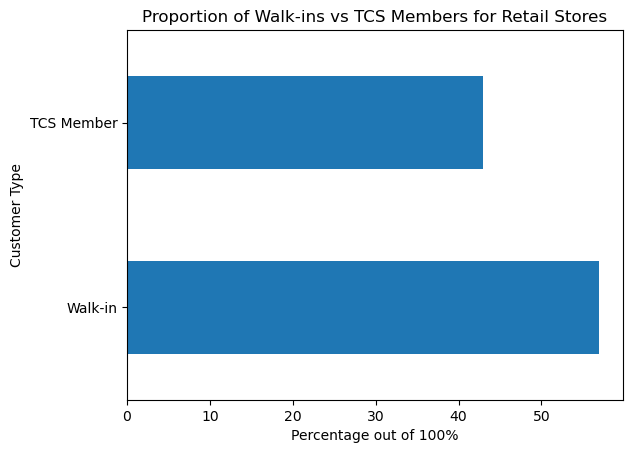

In [4]:
#Reassigning the member code as TCS member for further segregations of customer type
df_cust_code = retail_df[retail_df['Line Type'] == 'Sale']
df_cust_code['customer_type'] = df_cust_code['Customer Code'].apply(lambda x: "TCS Member" if x != "WALKIN" else "Walk-in")
df_cust_code.head()

df_cust_code.value_counts(subset='customer_type', normalize=True).mul(100).round(1).plot(kind='barh')

plt.title("Proportion of Walk-ins vs TCS Members for Retail Stores")
plt.xlabel("Percentage out of 100%")
plt.ylabel("Customer Type")

Comment:

Less than half of customers that visit the retail stores are members

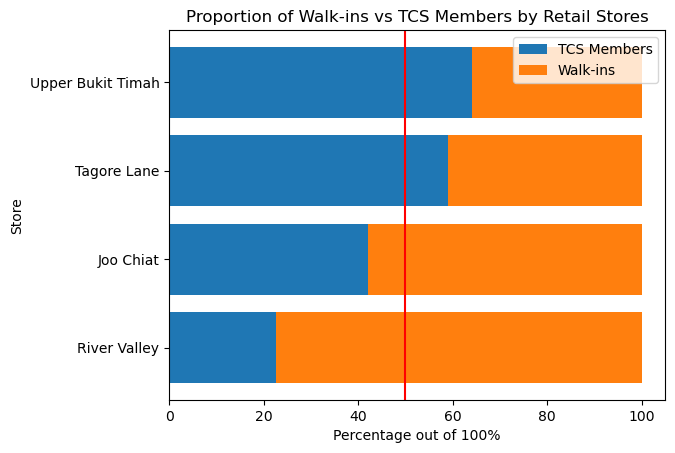

In [5]:
#Changing member code to TCS customer for segregation of customer type
df_cust_code = retail_df[retail_df['Line Type'] == 'Sale']
df_cust_code['Walk-ins'] = df_cust_code['Customer Code'].apply(lambda x: 1 if x == "WALKIN" else 0)
df_cust_code['TCS Members'] = df_cust_code['Customer Code'].apply(lambda x: 0 if x == "WALKIN" else 1)
df_cust_code_groupby_stores = df_cust_code.groupby(by='Register', as_index=False).sum()
df_cust_code_groupby_stores['Walk-in'] = df_cust_code_groupby_stores['Walk-ins']*100/(df_cust_code_groupby_stores['Walk-ins']+df_cust_code_groupby_stores['TCS Members'])
df_cust_code_groupby_stores['TCS Member'] = df_cust_code_groupby_stores['TCS Members']*100/(df_cust_code_groupby_stores['Walk-ins']+df_cust_code_groupby_stores['TCS Members'])
df_cust_code_groupby_stores.sort_values(by='TCS Member', ascending=True, inplace=True)
df_cust_code_groupby_stores.replace(['Upper BT', 'Tagore01', 'Joo Chiat', 'RiverValley1'], ['Upper Bukit Timah', 'Tagore Lane', 'Joo Chiat', 'River Valley'], inplace=True)

plt.barh(df_cust_code_groupby_stores['Register'], df_cust_code_groupby_stores['TCS Member'], label="TCS Members")
plt.barh(df_cust_code_groupby_stores['Register'], df_cust_code_groupby_stores['Walk-in'], left=df_cust_code_groupby_stores['TCS Member'], label="Walk-ins")


plt.legend()
plt.title("Proportion of Walk-ins vs TCS Members by Retail Stores")
plt.xlabel("Percentage out of 100%")
plt.ylabel("Store")
plt.axvline(x=50,c="Red")

Comment:

More than half of Upper Bukit Timah Store and Tagore Store visits consist of members. This may be attributed to the stores being situated in residential neighbourhoods. Where as the Joo Chiat and River Valley Stores are situated at lifestyle destinations, hence, more than half the store visits are by ad-hoc walk-ins

Text(0, 0.5, 'Total Receipts')

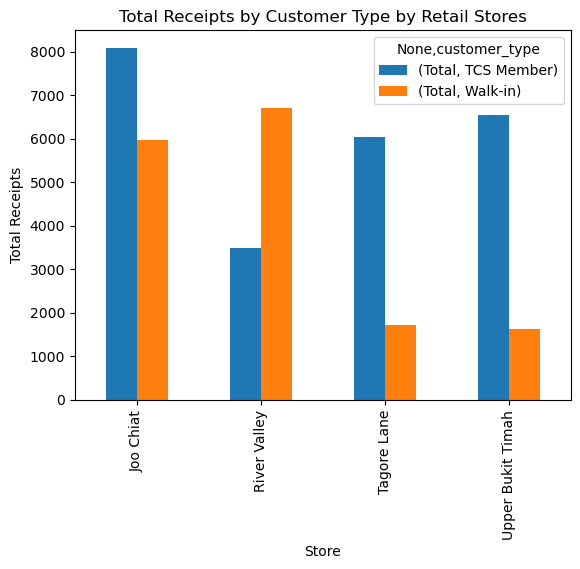

In [6]:
df_cust_code = retail_df[retail_df['Line Type'] == 'Sale']
df_cust_code.replace(['Upper BT', 'Tagore01', 'Joo Chiat', 'RiverValley1'], ['Upper Bukit Timah', 'Tagore Lane', 'Joo Chiat', 'River Valley'], inplace=True)
df_cust_code['customer_type'] = df_cust_code['Customer Code'].apply(lambda x: "TCS Member" if x != "WALKIN" else "Walk-in")
df_cust_code_groupby_store_customer_type = df_cust_code.groupby(by=['Register', 'customer_type']).sum()
df_cust_code_groupby_store_customer_type[['Total']].unstack().plot(kind='bar')

plt.title("Total Receipts by Customer Type by Retail Stores")
plt.xlabel("Store")
plt.ylabel("Total Receipts")

Comment:

Due to Tagore Lane and Upper Bukit Timah's location in the residential neighbourhoods, the total expenditure of members far exceed that of the walk in.

River Valley being a lifestyle destination, has higher proportion of walk in expenditure

Joo Chiat being the "HQ" and being situated in a mix of residential and lifestyle destination has more member expenditure

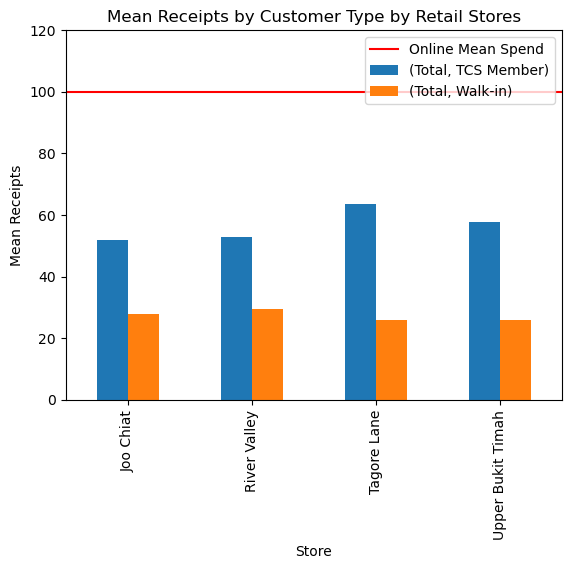

In [7]:
df_cust_code = retail_df[retail_df['Line Type'] == 'Sale']
df_cust_code.replace(['Upper BT', 'Tagore01', 'Joo Chiat', 'RiverValley1'], ['Upper Bukit Timah', 'Tagore Lane', 'Joo Chiat', 'River Valley'], inplace=True)
df_cust_code['customer_type'] = df_cust_code['Customer Code'].apply(lambda x: "TCS Member" if x != "WALKIN" else "Walk-in")
df_cust_code_groupby_store_customer_type = df_cust_code.groupby(by=['Register', 'customer_type']).mean()

df_cust_code_groupby_store_customer_type[['Total']].unstack().plot(kind='bar')

plt.title("Mean Receipts by Customer Type by Retail Stores")
plt.xlabel("Store")
plt.ylabel("Mean Receipts")
plt.ylim(0, 120)
plt.axhline(100, c='red', label='Online Mean Spend')
plt.legend()

Comment:

The expenditure of members is almost doubled of the walk-in customers, with Tagore Lane and Upper Bukit Timah's members having a higher expenditure per receipt

In [8]:
#Filling in empty customer type and shop location in the "Sale Line" by using information from the "Sale"
df_cust_code = retail_df.replace(['Upper BT', 'Tagore01', 'Joo Chiat', 'RiverValley1'], ['Upper Bukit Timah', 'Tagore Lane', 'Joo Chiat', 'River Valley'])
cust_type = []
for i in df_cust_code['Receipt Number']:
    filter_df = df_cust_code[df_cust_code['Line Type'] == 'Sale']
    cust_code = filter_df[filter_df['Receipt Number'] == i]['Customer Code'].reset_index(drop=True)
    cust_type.append(cust_code)
    
cust_type_clean = []
for i in cust_type:
    cust_type_clean.append(i[0])
    
reg_type = []
for i in df_cust_code['Receipt Number']:
    filter_df = df_cust_code[df_cust_code['Line Type'] == 'Sale']
    reg_code = filter_df[filter_df['Receipt Number'] == i]['Register'].reset_index(drop=True)
    reg_type.append(reg_code)
    
reg_type_clean = []
for i in reg_type:
    reg_type_clean.append(i[0])
    
df_cust_code['customer_walkinornot'] = cust_type_clean
df_cust_code['register_type'] = reg_type_clean
df_cust_code['customer_type'] = df_cust_code['customer_walkinornot'].apply(lambda x: "TCS Member" if x != "WALKIN" else "Walk-in")
df_cust_code = df_cust_code[~df_cust_code['Details'].str.contains('Rounding')]

df_by_cust_type = df_cust_code[df_cust_code['Line Type'] == 'Sale Line'].groupby(by=['customer_type', 'Details']).count()
df_by_cust_type.reset_index(inplace=True)

In [9]:
#Checking top 20 items bought by walkin customers
df_by_cust_type[df_by_cust_type['customer_type'] == 'Walk-in'].sort_values(by=['Total'],ascending=False)[['customer_type', 'Details', 'Total']].head(20)

,customer_type,Details,Total
448,Walk-in,Brie with Truffles,55
455,Walk-in,Burrata d'Oro 200g,55
685,Walk-in,Plastic Bag,46
642,Walk-in,Mr Kneady Sourdough Medium,33
579,Walk-in,Greenheart Mini Heirloom Tomatoes 250g,30
671,Walk-in,Parmigiano Reggiano 36 Months,28
607,Walk-in,La Bufala Buffalo Mozzarella 100g,27
410,Walk-in,Applewood Smoked Cheddar,25
480,Walk-in,Comte Janier (18 Mths),25
481,Walk-in,Comte Janier (30 mths),22


In [10]:
#Checking top 20 items bought by members
df_by_cust_type[df_by_cust_type['customer_type'] == 'TCS Member'].sort_values(by=['Total'],ascending=False)[['customer_type', 'Details', 'Total']].head(20)

,customer_type,Details,Total
56,TCS Member,Brie with Truffles,90
193,TCS Member,Greenheart Mini Heirloom Tomatoes 250g,52
66,TCS Member,Burrata d'Oro 200g,47
297,TCS Member,Peter's Yard Original Sourdough Crispbread,36
368,TCS Member,"The Fine Cheese Co. Walnut, Honey and Extra Vi...",35
385,TCS Member,Vacherousse D'Argental,33
206,TCS Member,Jamón Serrano Ham 100g,32
277,TCS Member,OG Kristal,32
218,TCS Member,La Bufala Buffalo Mozzarella 100g,31
54,TCS Member,Brie de Meaux AOC,28


Comment:

Seems that brie with truffle is super popular with the members and walk in customers

In [11]:
df_cust_code_temp = retail_df[retail_df['Line Type'] == 'Sale']
df_cust_code_temp.replace(['Upper BT', 'Tagore01', 'Joo Chiat', 'RiverValley1'], ['Upper Bukit Timah', 'Tagore Lane', 'Joo Chiat', 'River Valley'], inplace=True)
df_cust_code_temp['customer_type'] = df_cust_code_temp['Customer Code'].apply(lambda x: "TCS Member" if x != "WALKIN" else "Walk-in")

Text(0.5, 0, 'Total Expenditure per Transaction')

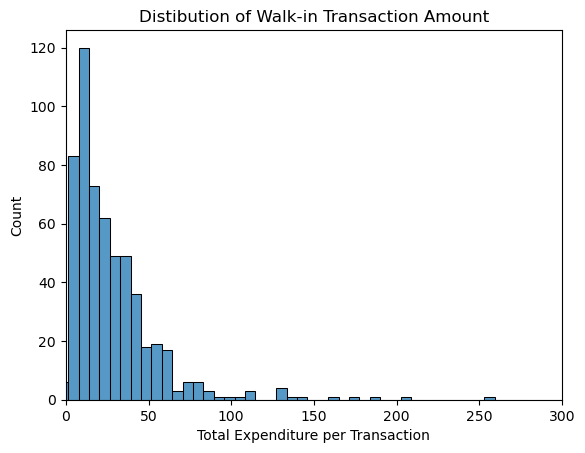

In [12]:
#Plotting distribution of walk in customer transaction amount
plt.xlim(0, 300)
sns.histplot(df_cust_code_temp[df_cust_code_temp['customer_type'] == "Walk-in"]['Total'], bins='auto')
plt.title("Distibution of Walk-in Transaction Amount")
plt.xlabel("Total Expenditure per Transaction")

Comment:

Walk in customers tend to spend around 20$

Text(0.5, 0, 'Total Expenditure per Transaction')

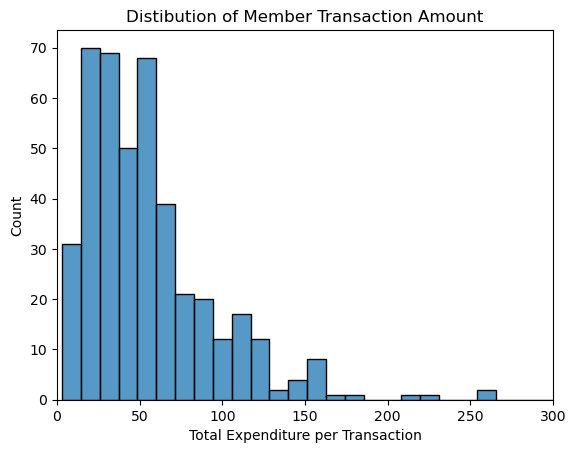

In [13]:
#Plotting distribution of member transaction amount
plt.xlim(0, 300)
sns.histplot(df_cust_code_temp[df_cust_code_temp['customer_type'] == "TCS Member"]['Total'], bins='auto')
plt.title("Distibution of Member Transaction Amount")
plt.xlabel("Total Expenditure per Transaction")

Comment:

Members tend to spend 25~50$

## Import of online transaction data

In [14]:
#Importing online transactions
online_df = pd.read_csv("../dataset/orders-2023-05-11.csv")

In [15]:
online_df.head()

,Order ID,Order Status,Order Date,Order Time,Tax Total,Order Total (inc tax),Order Total (ex tax),Refund Amount,Customer ID,Ship Method,...,Order Notes,Billing Country,Billing Suburb + State + Zip,Merchant-defined Order Status,Shipping State,Shipping State Abbreviation,Shipping Country,Shipping Suburb + State + Zip,Customer Group Name,Product Details
0,103,Completed,6/6/13,13:08:03,$0.00,$98.75,$98.75,0.0,3,Free Shipping,...,NaN,Singapore,NaN,Completed,NaN,NaN,Singapore,NaN,NaN,"Product ID: 81, Product Qty: 1, Product Name: ..."
1,104,Completed,6/6/13,17:41:00,$0.00,$95.00,$95.00,0.0,4,Free Shipping,...,NaN,Singapore,NaN,Completed,NaN,NaN,Singapore,NaN,NaN,"Product ID: 81, Product Qty: 2, Product Name: ..."
2,105,Completed,7/6/13,10:33:15,$0.00,$26.00,$26.00,0.0,5,Hand Delivery,...,NaN,Singapore,NaN,Completed,NaN,NaN,Singapore,NaN,NaN,"Product ID: 88, Product Qty: 1, Product Name: ..."
3,106,Completed,11/6/13,9:50:54,$0.00,$33.00,$33.00,0.0,6,Hand Delivery,...,NaN,Singapore,NaN,Completed,NaN,NaN,Singapore,NaN,NaN,"Product ID: 88, Product Qty: 1, Product Name: ..."
4,107,Completed,11/6/13,18:44:40,$0.00,$56.04,$56.04,0.0,7,Free Shipping,...,NaN,Singapore,NaN,Completed,NaN,NaN,Singapore,NaN,NaN,"Product ID: 77, Product Qty: 2, Product Name: ..."


Comment:

The items sold are all lumped into one single string in "Product Details"

In [16]:
%%time

#Extract the Product Details, and further split it by the comma, semi colon, and clean up of the data, then append it back into a list
orders_list = []
sub_order_list = []

for i in range(0,online_df.shape[0]):
    orderid = online_df['Order ID'][i]
    # date = online_df['Order Date'][i]
    try:
        product_splits = online_df.iloc[i]['Product Details'].split("|")
        product_info = []
        for i in product_splits:
            product_info.append(i.split(", "))

        product_info_orderid = []
        for i in product_info:
            n = i + [f"Order ID: {orderid}"]
            # + [f"Date: {date}"]
            product_info_orderid.append(n)

        product_info_orderid_removed_header = []
        for i in product_info_orderid:
            for i in i:
                product_info_orderid_removed_header.append(i.split(": "))

        product_info_orderid_filtered = []
        for i in product_info_orderid_removed_header:
            product_info_orderid_filtered.append(i[1])

        count = 0
        for i in product_info_orderid_filtered+["Empty Placeholder"]:
            if count <7:
                sub_order_list.append(i)
                count+=1
            elif count == 7:
                orders_list.append(sub_order_list)
                sub_order_list =[]
                sub_order_list.append(i)
                count = 1
                
    except IndexError:
        pass

final_online_list = []
for i in orders_list:
    if "Empty Placeholder" in i:
        c = i.remove("Empty Placeholder")
        final_online_list.append(c)
    else:
        final_online_list.append(i)
        
final_online_list = [x for x in final_online_list if x is not None]



CPU times: user 808 ms, sys: 10.8 ms, total: 819 ms
Wall time: 828 ms


In [17]:
final_online_list

[['81', '1', "Keen's Cheddar", '$35.00', '500.0000', '$35.00', '103'],
 ['83',
  '1',
  'Colston Basset Shropshire',
  '$17.50',
  '250.0000',
  '$17.50',
  '103'],
 ['85',
  '1',
  'Reypenaer V.S.O.P. Gouda',
  '$27.50',
  '250.0000',
  '$27.50',
  '103'],
 ['87', '1', 'Sharpham Rustic', '$18.75', '250.0000', '$18.75', '103'],
 ['82', '1', 'Colston Bassett Stilton', '$17.50', '250.0000', '$17.50', '104'],
 ['85',
  '1',
  'Reypenaer V.S.O.P. Gouda',
  '$27.50',
  '250.0000',
  '$27.50',
  '104'],
 ['89', '1', "Dorstone Goat's Cheese", '$15.00', '150.0000', '$15.00', '104'],
 ['89', '1', "Dorstone Goat's Cheese", '$15.00', '150.0000', '$15.00', '105'],
 ['88', '1', 'Wigmore', '$12.00', '100.0000', '$12.00', '106'],
 ['89', '1', "Dorstone Goat's Cheese", '$15.00', '100.0000', '$15.00', '106'],
 ['79', '2', 'Waterloo', '$6.00', '100.0000', '$12.00', '107'],
 ['88', '3', 'Wigmore', '$6.00', '100.0000', '$18.00', '107'],
 ['90', '2', 'Brie de Meaux', '$6.50', '100.0000', '$13.00', '107'],


In [18]:
#Put the list back into a dataframe
online_column_header = ['product_id', 'product_qty', 'product_name', 'product_unit_price', 'product_weight', 'product_total_price', 'transaction_id']
online_df = pd.DataFrame(final_online_list, columns=online_column_header)
online_df

,product_id,product_qty,product_name,product_unit_price,product_weight,product_total_price,transaction_id
0,81,1,Keen's Cheddar,$35.00,500.0000,$35.00,103
1,83,1,Colston Basset Shropshire,$17.50,250.0000,$17.50,103
2,85,1,Reypenaer V.S.O.P. Gouda,$27.50,250.0000,$27.50,103
3,87,1,Sharpham Rustic,$18.75,250.0000,$18.75,103
4,82,1,Colston Bassett Stilton,$17.50,250.0000,$17.50,104
...,...,...,...,...,...,...,...
46482,765,1,Double Cream Brie with Garlic and Herbs,$12.60,200.0000,$12.60,16550
46483,801,1,Double Gloucester with Stilton,$12.64,200.0000,$12.64,16550
46484,1044,1,Sheese Creamy Vegan Cheese Spread with Garlic ...,$9.90,225.0000,$9.90,16550
46485,1190,1,Snowdonia Pickle Power Cheddar with Pickled Onion,$12.60,200.0000,$12.60,16550


In [19]:
#Checking Top 20 items purchased in online stores
online_df_grouped = online_df.groupby(by=['product_name']).count().reset_index()
online_df_grouped.sort_values(by=['product_id'], ascending=False, inplace=True)
online_df_grouped = online_df_grouped[['product_name', 'product_id']]
online_df_grouped.head(20)

,product_name,product_id
454,Brie with Truffles,1144
972,Comte 18 months,752
544,Brillat Savarin with Truffles,750
1277,Double Cream Brie with Garlic and Herbs,629
2340,Parmigiano Reggiano 36 months,623
425,Brie de Meaux AOC,527
2002,Manchego - 12 months,471
1302,Délice de Bourgogne,466
69,Applewood Smoked Cheddar,445
1673,Gruyère de Savoie,440


In [20]:
#Checking oddities in the product total price and remove the $ sign
online_df['expenditure'] = online_df['product_total_price'].apply(lambda x: x[1:])
online_df.sort_values(by=['expenditure'])

,product_id,product_qty,product_name,product_unit_price,product_weight,product_total_price,transaction_id,expenditure
8181,0,1,Discount,-$13.72,0.0000,-$13.72,2894,$13.72
3728,252,24,Clotted Cream,-$7.49,170.0000,-$179.76,1412,$179.76
20087,1033,1,Father's Day GIFT & CARD,$0.00,90.0000,$0.00,6656,0.00
20092,1033,1,Father's Day GIFT & CARD,$0.00,90.0000,$0.00,6664,0.00
20475,1033,1,Father's Day GIFT & CARD,$0.00,90.0000,$0.00,6769,0.00
...,...,...,...,...,...,...,...,...
9948,0,1,1000 day gouda (2.566 kg),$99.03,0.0000,$99.03,3517,99.03
11578,0,1,Double Gloucester with Stilton (2.793 kg),$99.22,0.0000,$99.22,4069,99.22
4517,0,1,Cambazola Black (2.016 kg),$99.23,0.0000,$99.23,1709,99.23
5768,0,1,Colston Basset Stilton (2.130 kg),$99.57,0.0000,$99.57,2133,99.57


Comment:

Seems that two lines have $ sign left

In [21]:
#Drop the 2 lines

online_df.drop(index=[8181,3728],inplace=True)
online_df.sort_values(by=['expenditure'])

,product_id,product_qty,product_name,product_unit_price,product_weight,product_total_price,transaction_id,expenditure
20327,1033,1,Father's Day GIFT & CARD,$0.00,90.0000,$0.00,6738,0.00
30352,771,1,Brie with Cranberries,$0.00,100.0000,$0.00,9995,0.00
30353,818,1,Peter's Yard Seeded Flatbread,$0.00,135.0000,$0.00,9995,0.00
37201,956,4,Traditional English Pork Pie by Rabbit Carrot ...,$0.00,350.0000,$0.00,12534,0.00
30354,1035,1,Cottage Delight Classic Cheese Maker's Pickle,$0.00,335.0000,$0.00,9995,0.00
...,...,...,...,...,...,...,...,...
9948,0,1,1000 day gouda (2.566 kg),$99.03,0.0000,$99.03,3517,99.03
11578,0,1,Double Gloucester with Stilton (2.793 kg),$99.22,0.0000,$99.22,4069,99.22
4517,0,1,Cambazola Black (2.016 kg),$99.23,0.0000,$99.23,1709,99.23
5768,0,1,Colston Basset Stilton (2.130 kg),$99.57,0.0000,$99.57,2133,99.57


In [22]:
#Finding mean exppenditure per transaction

online_df['expenditure'] = online_df['expenditure'].astype('float')
online_df_grouped_mean_price = online_df.groupby(by=['transaction_id']).sum().reset_index()
print(f"The mean expenditure per transaction is {online_df_grouped_mean_price['expenditure'].mean().round()}$")

The mean expenditure per transaction is 107.0$


Text(0.5, 0, 'Total Expenditure per Transaction')

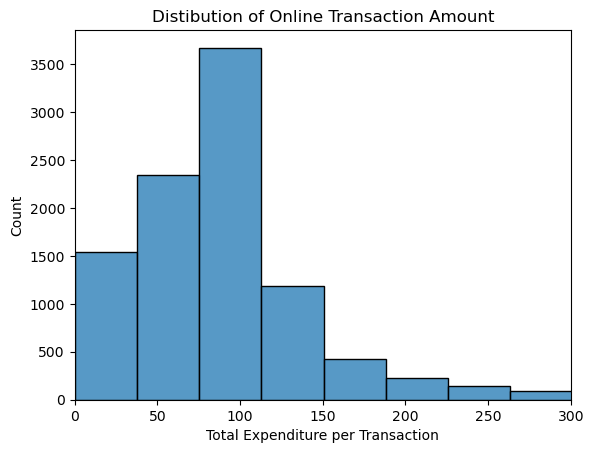

In [23]:
#Checking distribution of expenditure from online tore
plt.xlim(0, 300)
sns.histplot(online_df_grouped_mean_price['expenditure'], bins=100)
plt.title("Distibution of Online Transaction Amount")
plt.xlabel("Total Expenditure per Transaction")

Comment:
    
Seems that many transaction are 100$ and above, they probably are trying to hit the 100$ min for free delivery

In [24]:
online_column_header = ['transaction_id', 'product_name', 'product_qty', 'product_id', 'product_unit_price', 'product_weight', 'product_total_price']
online_df = online_df[online_column_header]
online_df = online_df[['transaction_id', 'product_id','product_name', 'product_qty', 'product_total_price']]

In [25]:
online_df.to_csv("../dataset/online_cleaned_up.csv", index=False)

In [26]:
online_df

,transaction_id,product_id,product_name,product_qty,product_total_price
0,103,81,Keen's Cheddar,1,$35.00
1,103,83,Colston Basset Shropshire,1,$17.50
2,103,85,Reypenaer V.S.O.P. Gouda,1,$27.50
3,103,87,Sharpham Rustic,1,$18.75
4,104,82,Colston Bassett Stilton,1,$17.50
...,...,...,...,...,...
46482,16550,765,Double Cream Brie with Garlic and Herbs,1,$12.60
46483,16550,801,Double Gloucester with Stilton,1,$12.64
46484,16550,1044,Sheese Creamy Vegan Cheese Spread with Garlic ...,1,$9.90
46485,16550,1190,Snowdonia Pickle Power Cheddar with Pickled Onion,1,$12.60


## Amalgamation of Retail and Online transactions

In [27]:
online_df

,transaction_id,product_id,product_name,product_qty,product_total_price
0,103,81,Keen's Cheddar,1,$35.00
1,103,83,Colston Basset Shropshire,1,$17.50
2,103,85,Reypenaer V.S.O.P. Gouda,1,$27.50
3,103,87,Sharpham Rustic,1,$18.75
4,104,82,Colston Bassett Stilton,1,$17.50
...,...,...,...,...,...
46482,16550,765,Double Cream Brie with Garlic and Herbs,1,$12.60
46483,16550,801,Double Gloucester with Stilton,1,$12.64
46484,16550,1044,Sheese Creamy Vegan Cheese Spread with Garlic ...,1,$9.90
46485,16550,1190,Snowdonia Pickle Power Cheddar with Pickled Onion,1,$12.60


In [28]:
#Restructure phyyscial store transactions into the format of online_df

retail_df_filtered = retail_df[retail_df['Line Type'] == 'Sale Line']
retail_df_filtered = retail_df_filtered[['Quantity', 'Receipt Number', 'Total', 'Details', 'Sku']]
retail_column_header = ['product_qty', 'transaction_id', 'product_total_price', 'product_name', 'product_id']
retail_df_filtered.columns = retail_column_header
retail_df_filtered = retail_df_filtered[['transaction_id', 'product_id', 'product_name', 'product_qty', 'product_total_price']]
retail_df_filtered

,transaction_id,product_id,product_name,product_qty,product_total_price
1,146499,10216,Delice de Bourgogne,0.188,12.0320
2,146499,10765,Double Cream Brie with Garlic & Herbs,0.150,9.0000
3,146499,3.47E+12,Adrien Peyrolles Mini Ball Plain,1.000,8.0000
4,146499,3.47E+12,Adrien Peyrolles Mini Ball Plain,1.000,8.0000
5,146499,8.44E+12,Jamón Serrano Ham 100g,1.000,7.8000
...,...,...,...,...,...
6024,146130,5.02E+12,Cottage Delight Classic Italian Breadsticks,1.000,5.9000
6025,146130,5.06E+12,Peter's Yard Original Sourdough Crispbread,1.000,7.5000
6028,TG24917,72830081191,Tillamook Mudslide Ice Cream,1.000,18.9500
6029,TG24917,2.02E+11,Momolato Dark Chocolate Sorbet,1.000,12.4995


In [29]:
combined_df = pd.concat([online_df,retail_df_filtered]).reset_index(drop=True)
combined_df

,transaction_id,product_id,product_name,product_qty,product_total_price
0,103,81,Keen's Cheddar,1,$35.00
1,103,83,Colston Basset Shropshire,1,$17.50
2,103,85,Reypenaer V.S.O.P. Gouda,1,$27.50
3,103,87,Sharpham Rustic,1,$18.75
4,104,82,Colston Bassett Stilton,1,$17.50
...,...,...,...,...,...
50331,146130,5.02E+12,Cottage Delight Classic Italian Breadsticks,1.0,5.9
50332,146130,5.06E+12,Peter's Yard Original Sourdough Crispbread,1.0,7.5
50333,TG24917,72830081191,Tillamook Mudslide Ice Cream,1.0,18.95
50334,TG24917,2.02E+11,Momolato Dark Chocolate Sorbet,1.0,12.4995


In [30]:
combined_df.to_csv("../dataset/combined.csv", index=False)